# Using Fourier Series to Reconstruct an Image With Python 

The code below describes basic image manipulation and processing with Python packages **numpy** and **pillow** (a fork of the PIL library). This code is intended for those who have knowledge of fourier series calculus and wish to see how it can be used easily in python to work on images saved onto a drive. 

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

Let's first discuss RGB images and how they are stored! All images contain pixels, which in a colored image, is stored as 3 bytes. This means that RGB images are stored as 3-dimensional arrays of 8-bit unsigned integers. Essentially, images are represented by a collection of matrices that store all this information. The shape of the array of matrices created is height x width x 3, where height is the height of the image in pixels, width is the width of the image in pixels, and 3 is number of byte values in each pixel. It is this notation that allows us to perform the Fourier Series to generate functions that approximate what the original image looks like, based on this numerical information gathered from the original image. 

For our example, let's start by reading in the image saved onto the computer using *Image.open.* 

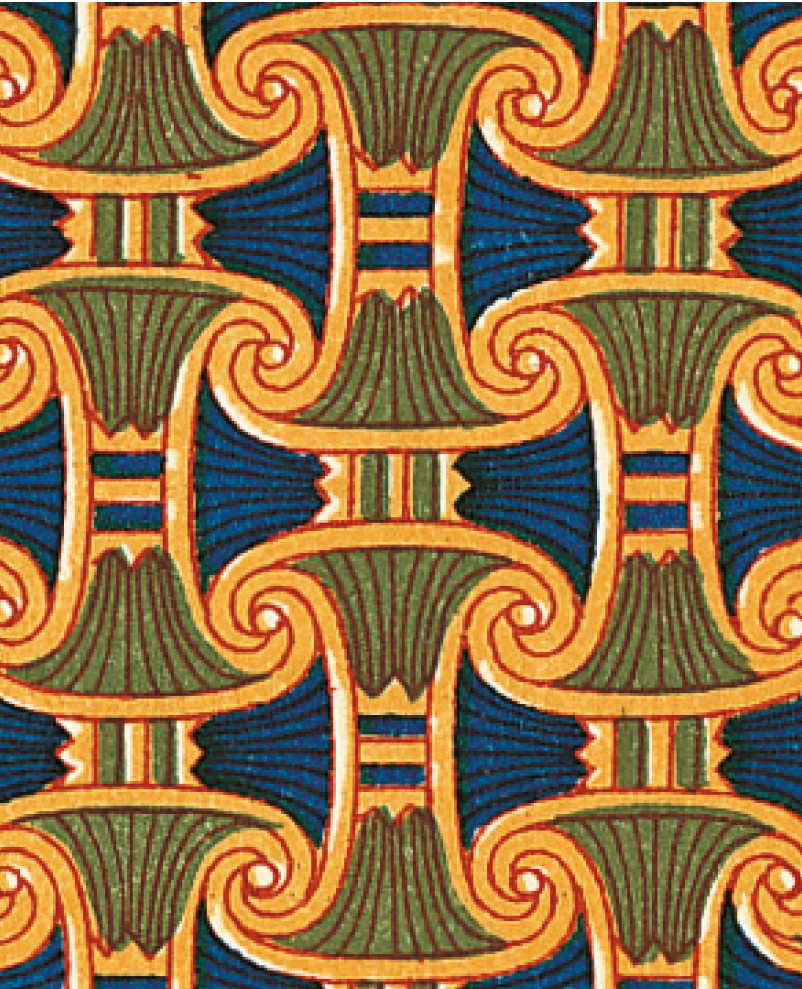

In [2]:
original_image = Image.open('pattern.jpg')
original_image

We can now use *np.asarray* to get the matrix representation of the image or the value for each pixel of the NumPy array image. Here, I print out the first 2 elements in the array of matrices created that describe the image. 

In [3]:
imagematrix = np.asarray(original_image)
imagematrix[1:2]

array([[[233, 255, 255],
        [238, 255, 255],
        [242, 255, 255],
        ...,
        [249, 255, 255],
        [252, 253, 255],
        [253, 254, 255]]], dtype=uint8)

We can also get the image size using *np.shape.* As described before, 989 is the height, 802 is the width, and 3 is the number of bytes to describe this colored image. 

In [4]:
np.shape(original_image)

(989, 802, 3)

This shape indicates 3-dimensions. This is because we read in a colored images are always represented as numpy 3D arrays, or a collection of three 2D arrays for each red, green, or blue channel. While in our case a full color image is not important, information is lost when only one of these channels is plotted. Below we set up 3 plots that shows what happens when only one of the RGB channels is plotted.  

In [5]:
channel_one = np.asarray(original_image)[:,:,0]
channel_two = np.asarray(original_image)[:,:,1]
channel_three = np.asarray(original_image)[:,:,2]

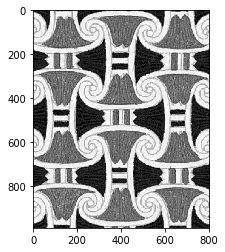

In [6]:
plt.imshow(channel_one, cmap="gist_gray");

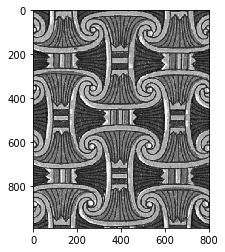

In [7]:
plt.imshow(channel_two, cmap="gist_gray");

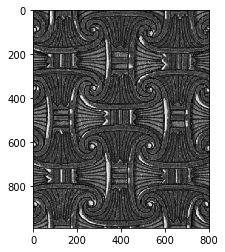

In [8]:
plt.imshow(channel_three, cmap="gist_gray");

Instead, let's start by opening the image again but also converting it to an 8bit black and white image using *.convert('l').* 

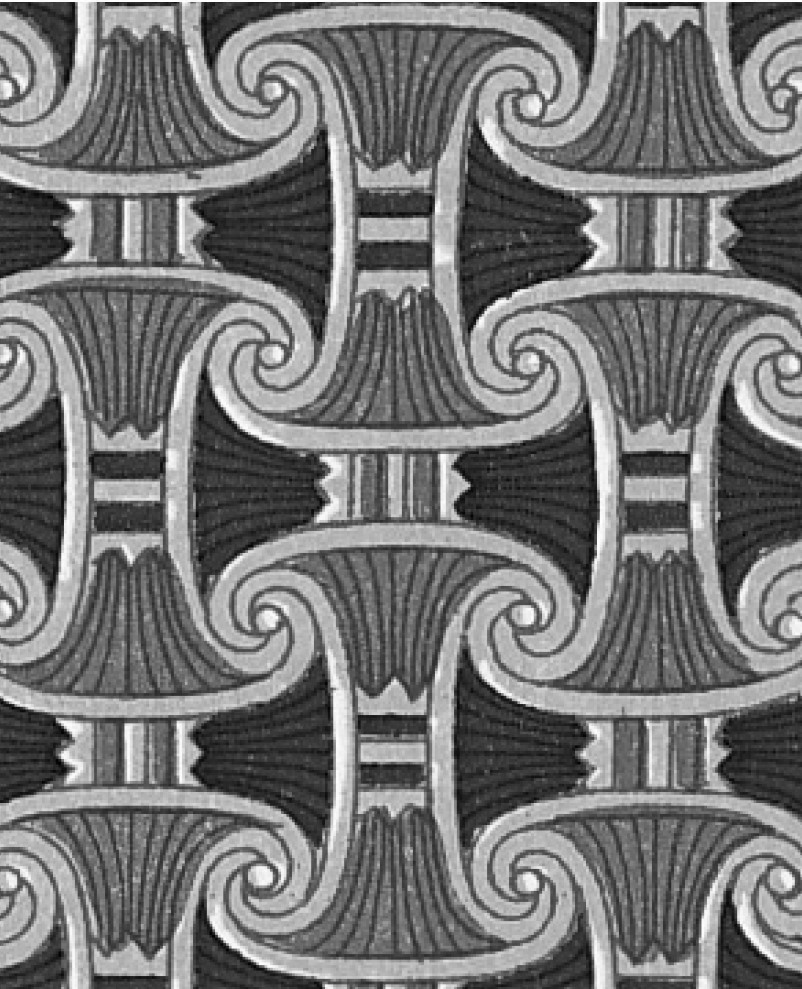

In [9]:
image = Image.open('pattern.jpg').convert('L')
image

Just as before, we can retrieve the matrix representation of each pixel using *np.asarray.*

In [10]:
imagedata = np.asarray(image)
imagedata

array([[251, 254, 250, ..., 254, 253, 253],
       [248, 250, 251, ..., 253, 253, 254],
       [ 59,  52,  51, ...,  50,  60,  62],
       ...,
       [ 68,  77,  75, ...,  32,  40,  40],
       [ 64,  75,  73, ...,  50,  47,  47],
       [ 62,  74,  73, ...,  50,  50,  50]], dtype=uint8)

Again, we can get the image size using *np.shape.* As we can see here, only a 2D numpy array is created because the image was converted to a greyscale. 

In [11]:
np.shape(image)

(989, 802)

Once we read in the image, we can compute the 2-dimensional discrete fourier transform using *np.fft.fft2.* Next,*np.fft.fftshift* shifts the 0 frequency component to center of the spectrum instead of at the top and at the bottom left. Finally, *np.copy* returns an array copy of the object, *image_fft_shifted.* 

In [14]:
image_fft = np.fft.fft2(image)
image_fft_shifted = np.fft.fftshift(image_fft)
image_filtered = np.copy(image_fft_shifted)
image_filtered

array([[  310.02063052 -544.01713314j,   174.83187874 +298.34129544j,
          959.23500004 +408.04305024j, ...,
          116.5816422  -585.04486678j,   197.38662924 +122.71939731j,
          -44.99739471 -163.99077633j],
       [  359.23694729  +80.86532849j,   351.81400554 +833.44307143j,
          111.56591661-1113.20727443j, ...,
          426.72354995 -167.41187184j,   545.54652353+1097.84346528j,
        -1082.43908293 +351.55845581j],
       [-1001.2971311    -4.30167175j,   483.45246184 -367.40358316j,
          -59.26781518 +155.22841105j, ...,
         -910.39337353 +904.99963227j,   264.47231828 -906.97515452j,
          296.78019411 +915.05490129j],
       ...,
       [-1001.2971311    +4.30167175j,   296.78019411 -915.05490129j,
          264.47231828 +906.97515452j, ...,
          -27.30999255 -382.06562578j,   -59.26781518 -155.22841105j,
          483.45246184 +367.40358316j],
       [  359.23694729  -80.86532849j, -1082.43908293 -351.55845581j,
          545.54652353

Next, we can put limits on how much we want to filter in the image we are using so that we can parametrize as a fraction of the original image. The exterior bounds where the filter is applied will create an image blur. 

In [17]:
mask_limit_y = 200
mask_limit_x = 200

image_filtered[0:mask_limit_y,:]=0+0j
image_filtered[-mask_limit_y:,:]=0+0j
image_filtered[:,0:mask_limit_x]=0+0j
image_filtered[:,-mask_limit_x:]=0+0j

After filtering out as much of the information as we want, we can shift the discrete Fourier Transform back using similar functions as before. Except in this case, we use *fft.ifftshift* to perform an inverse of the shift done earlier. The reconstructed image is created by computing the inverse Fourier Transform iwth *fft.ifft2.* 

In [18]:
image_filtered_shifted = np.fft.ifftshift(image_filtered)
reconstructed_image = np.fft.ifft2(image_filtered_shifted)

Now we can plot what exactly we are filtering out. We can get the magnitude by taking the real component of the complex conjugate of the complex numbers in *image_to_see* multiplied by the *image_to_see* itself.

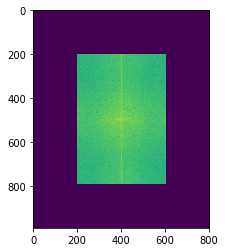

In [21]:
image_to_see = image_filtered
magnitude = (image_to_see*np.conj(image_to_see)).real

plt.imshow(magnitude**0.02);

Then we can plot the reconstructed image using the same approach as before! 

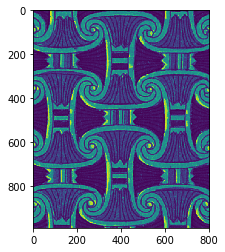

In [22]:
image_to_see = reconstructed_image
magnitude = (image_to_see*np.conj(image_to_see)).real

plt.imshow(magnitude);

We can compare this reconstructed image to the original image! 

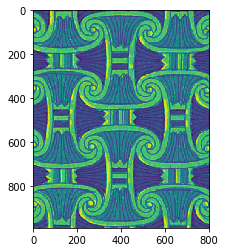

In [13]:
plt.imshow(image);

## Simple Version of Method
In our method, we first read in an image, convert it to an 8-bit black and white image, record the image size, compute the discrete fourier transform easily using python functions, recenter the discrete fourier transform, filter all but a small square in the middle, shift the discrete fourier transform back, invert the discrete fourier transform, and then display the reconstructed image! 

## Resources
* https://e2eml.school/convert_rgb_to_grayscale.html
* https://www.pythoninformer.com/python-libraries/numpy/numpy-and-images/